In [23]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(r"../data/model_ready_data.csv", parse_dates=['date'])

In [29]:
# Split data into train and test sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df['price_diff'].iloc[:train_size], df['price_diff'].iloc[train_size:]

In [31]:
# Fit ARIMA model
# Start with (1,1,1) as baseline - we'll optimize later
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

# Display model summary
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             price_diff   No. Observations:                 1168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 183.719
Date:                Mon, 11 Aug 2025   AIC                           -361.438
Time:                        17:17:58   BIC                           -346.251
Sample:                             0   HQIC                          -355.709
                               - 1168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1667      0.013    -12.913      0.000      -0.192      -0.141
ma.L1         -1.0000      0.869     -1.151      0.250      -2.703       0.703
sigma2         0.0419      0.036      1.151      0.2

In [33]:
# Make predictions
arima_forecast = arima_fit.forecast(steps=len(test))

In [35]:
# Calculate evaluation metrics
arima_mse = mean_squared_error(test, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test, arima_forecast)

print(f"\nARIMA Model Performance:")
print(f"MSE: {arima_mse:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAE: {arima_mae:.4f}")


ARIMA Model Performance:
MSE: 0.0185
RMSE: 0.1360
MAE: 0.0886


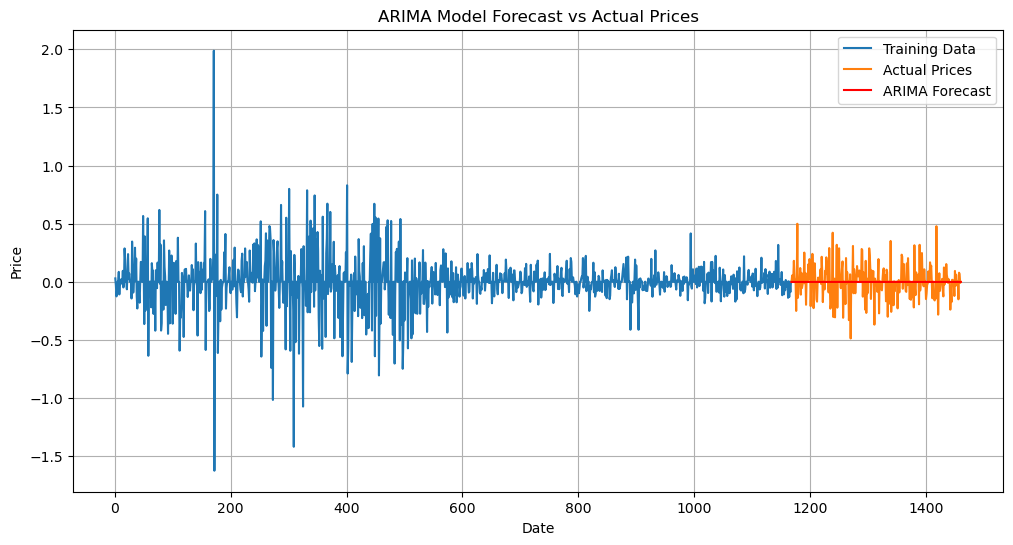

In [37]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()